<a href="https://colab.research.google.com/github/FluffySce/GenAI-mini-projects/blob/main/MiniProj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import re
#natural lang toolkit
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#to compute metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#to tune different models
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("/content/Product_Reviews.csv")
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

In [4]:
df.shape
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [5]:
df = df.drop_duplicates()

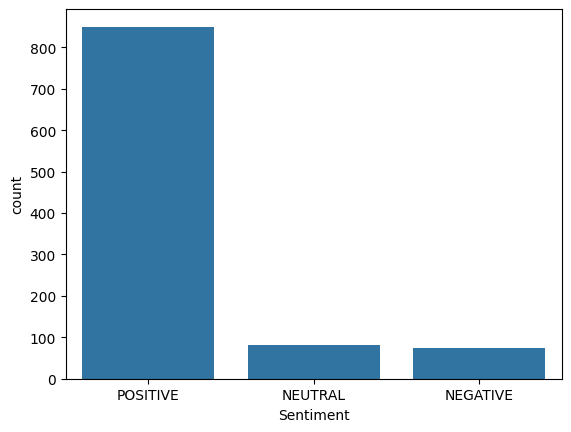

In [6]:
sns.countplot(data=df, x='Sentiment');

In [7]:
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


In [8]:
def remove_special_characters(text):
  pattern = '[^A-Za-z0-9]+'
  new_text = ''.join(re.sub(pattern, ' ', text))
  return new_text

In [9]:
df['cleaned_text'] = df['Product Review'].apply(remove_special_characters)

In [10]:
df.loc[0:1,['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

In [11]:
df['cleaned_text'] = df['cleaned_text'].str.strip().str.lower()

In [12]:
df.loc[0:1,['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [13]:
def remove_stopwords(text):
  words = text.split()
  new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
  return new_text

In [14]:
df['cleaned_text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

In [15]:
df.loc[0:1,['Product Review', 'cleaned_text_without_stopwords']]

,Product Review,cleaned_text_without_stopwords
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire 

In [16]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ["running", "studies", "files", "easily"]
for word in words:
  print(f"{word} → {stemmer.stem(word)}")

running → run
studies → studi
files → file
easily → easili


In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '15' '16' '17' '20' '2013' '2014' '2015']
last 10 words ['wouldn' 'writing' 'wrong' 'year' 'years' 'yes' 'yet' 'you' 'your'
 'youtube']


,10,100,11,15,16,17,20,2013,2014,2015,...,wouldn,writing,wrong,year,years,yes,yet,you,your,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.156585,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.058969,0.0,0.000000,0.150469,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.251493,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.051092,0.0,0.000000,0.078221,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.043512,0.0,0.000000,0.044411,0.0,0.0


In [23]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(df['cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '15' '16' '17' '20' '2013' '2014' '2015']
last 10 words ['wouldn' 'writing' 'wrong' 'year' 'years' 'yes' 'yet' 'you' 'your'
 'youtube']


,10,100,11,15,16,17,20,2013,2014,2015,...,wouldn,writing,wrong,year,years,yes,yet,you,your,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,5,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0


In [24]:
# Initializing CountVectorizer with top 1000 words
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2))

# Applying CountVectorizer on data
data_features_ngram = ngram.fit_transform(df['cleaned_text'])

# Convert the data features to array
data_features_ngram = data_features_ngram.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_ngram.shape)

# Getting the 1000 words considered by the BoW model
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '15' '16' '20' '2013' '2015' '30' '300' 'ability' 'ability to']
last 10 words ['you are' 'you can' 'you don' 'you get' 'you have' 'you re' 'you want'
 'you will' 'your' 'youtube']


,10,15,16,20,2013,2015,30,300,ability,ability to,...,you are,you can,you don,you get,you have,you re,you want,you will,your,youtube
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,0


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

# Your target variable
y = df['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    # Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")





📊 Model Performance (Macro F1-scores):

RandomForest - BoW            : Macro F1 = 0.5047
NaiveBayes - BoW              : Macro F1 = 0.4867
NaiveBayes - N-gram           : Macro F1 = 0.4779
RandomForest - TF-IDF         : Macro F1 = 0.4769
RandomForest - N-gram         : Macro F1 = 0.4707
NaiveBayes - TF-IDF           : Macro F1 = 0.3414



✅ Best Model: RandomForest - BoW (Macro F1 = 0.5047)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.67      0.12      0.21        16
     NEUTRAL       1.00      0.24      0.38        17
    POSITIVE       0.86      0.99      0.92       168

    accuracy                           0.86       201
   macro avg       0.84      0.45      0.50       201
weighted avg       0.86      0.86      0.82       201



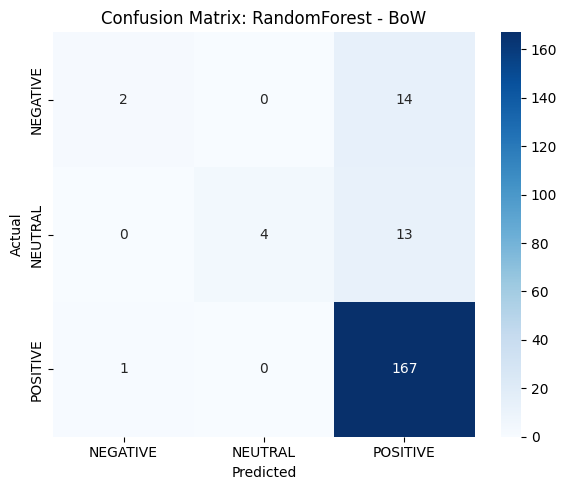

In [26]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()